In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from keras.datasets import mnist
from keras import models
from keras import layers

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.gray()

<Figure size 640x480 with 0 Axes>

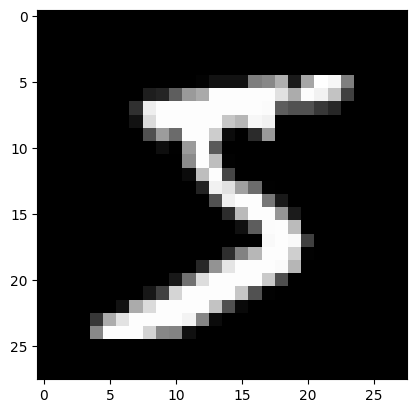

In [11]:
plt.imshow(train_images[0])

In [12]:
train_labels[0]

5

In [14]:
model_cnn = models.Sequential()

Layer Details:

- 2 dimensional Convolution Layer

- Number of filters/kernels = 32

- Filter/Kernel Size = 3x3

- Activation Function = relu (for non-linearity detection)

- Input Shape = 28x28 matrix with 1 channel (as image is gray scale, we have only 1 channel)

In [15]:
model_cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Layer Details:

- Downsample the output from previous layer

- We will take the max value for a every 2x2 window ... moved over the input

In [16]:
model_cnn.add(layers.MaxPooling2D(2,2))

Layer Details:

- 2 dimensional Convolution Layer

- Number of filters/kernels = 64

- Filter/Kernel Size = 3x3

- Activation Function = relu (for non-linearity detection)

In [17]:
model_cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

Layer Details:

- Downsample the output from previous layer

- We will take the max value for a every 2x2 window ... moved over the input

In [18]:
model_cnn.add(layers.MaxPooling2D(2,2))

Layer Details:

- 2 dimensional Convolution Layer

- Number of filters/kernels = 64

- Filter/Kernel Size = 3x3

- Activation Function = relu (for non-linearity detection)

In [19]:
model_cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

Data at this stage is in matrix form. We will convert it to vector form to feed to a fully connected network (FCN).

In [20]:
model_cnn.add(layers.Flatten())

We will design for 64 outputs with activation function as relu (to learn non-linearity).

In [21]:
model_cnn.add(layers.Dense(64, activation = 'relu'))

This is the final layer. Hence, the outputs will be 10 corresponding to the 10 digits (0 to 9). Activation Function chosen here is softmax to have a probabilistic output.

In [22]:
model_cnn.add(layers.Dense(10, activation = 'softmax'))

In [23]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
train_images.shape

(60000, 28, 28)

CNN needs another dimension for the channel. Here as the image is gray scale it will be 1 channel. If we had color images, the channel value would have been 3 for the three channels - Red, Green and Blue.

In [26]:
train_images_cnn = train_images.reshape(60000, 28, 28, 1)
train_images_cnn.shape

(60000, 28, 28, 1)

We need to change the element values from integer to decimal to have continuos values during prediction through the various layers. We will limit the values to the interval [0,1] so that the model treats each sample with equal weightage as the range of values for all samples will be fixed. We will do this by dividing the decimal values by 255 (gray scale values are from 0 to 255 ... 0 representing black to white).

In [27]:
train_images_cnn = train_images_cnn.astype('float32') / 255
test_images_cnn = test_images.reshape(10000, 28, 28, 1)
test_images_cnn = test_images_cnn.astype('float32') / 255

In [28]:
from keras.utils import to_categorical
train_labels_cnn = to_categorical(train_labels)
test_labels_cnn = to_categorical(test_labels)
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

We will now train the model using train images and train labels.
- We will use a batch size = 60.
- 1 epoch = 60000 / 60 = 1000 batches
- 1 epoch = 1 complete run of all train samples for training the model
- We will go for a total of 5 epochs = 5 complete runs of the all train samples

In [29]:
model_cnn.fit(train_images_cnn, train_labels_cnn, epochs = 5, batch_size = 60)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 57s 55ms/step - accuracy: 0.8815 - loss: 0.3765
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 88s 62ms/step - accuracy: 0.9850 - loss: 0.0481
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 73s 53ms/step - accuracy: 0.9898 - loss: 0.0320
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 54ms/step - accuracy: 0.9929 - loss: 0.0241
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.9944 - loss: 0.0188


Randomly printing the predicted model value for one of the test set data

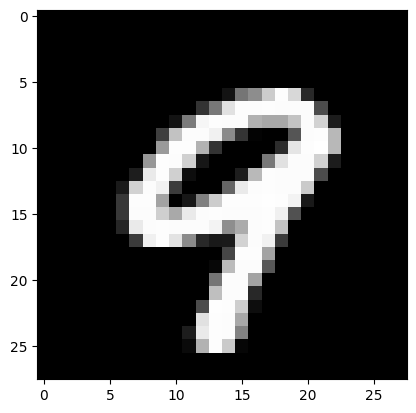

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
True Label: 9
Predicted Label: 9


In [40]:
i = 5002
plt.imshow(test_images[i], cmap='gray')
plt.show()
preprocessed_image = test_images[i] / 255.0
preprocessed_image = np.expand_dims(preprocessed_image, axis=0)
prediction = model_cnn.predict(preprocessed_image)
predicted_label = np.argmax(prediction)
print("True Label:", test_labels[i])
print("Predicted Label:", predicted_label)


We will now test model's performance with the test data.

- We predict the class for each of the 10000 test using the model.
- We will check the test accuracy.

In [41]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9881 - loss: 0.0482


In [42]:
print('test accuracy:', (test_acc_cnn*100))

test accuracy: 99.04999732971191
